# IEEE-CIS fraud detection 

## 데이터 불러오기 

In [2]:
#불러오기 
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor


** featuring engineering ! **

1. train/test 합쳐서 전처리 및 feature engineering 진행 필요 

2. test data 합치기 전에 target 분리 

```python
features = train_transaction.iloc[:, 2:]
target = train_transaction.iloc[:, 1]
```


In [3]:
train_identity = pd.read_csv('/Users/krc/PycharmProjects/1_fraud_detection/data/train_identity.csv')
train_transaction = pd.read_csv('/Users/krc/PycharmProjects/1_fraud_detection/data/train_transaction.csv')
test_transaction = pd.read_csv('/Users/krc/PycharmProjects/1_fraud_detection/data/test_transaction.csv')


train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train_transaction.iloc[:, 0].name

'TransactionID'

<AxesSubplot:xlabel='isFraud'>

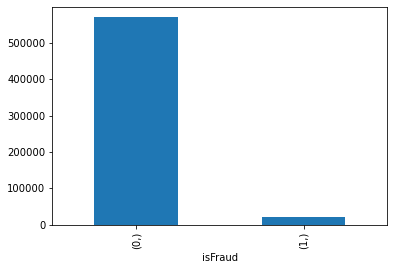

In [5]:
# is fraud 의 비율 : 3.6%
ax = train_transaction[['isFraud']].value_counts()
ax.plot.bar()

In [6]:
pd.set_option('display.max_columns', None)
train_identity.head(5).sort_values('TransactionID')

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [7]:
train_transaction.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

### Column 선정

#### C-columns

In [8]:
train_transaction[[f'C{i}' for i in range(1,15) ]].nunique()

C1     1657
C2     1216
C3       27
C4     1260
C5      319
C6     1328
C7     1103
C8     1253
C9      205
C10    1231
C11    1476
C12    1199
C13    1597
C14    1108
dtype: int64

In [9]:
sorted(train_transaction['C3'].unique())

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0]

C value 컬럼 특징
- 결측치 없음
- C3 의 nunique : 27 ( 0 ~ 26)
- 

In [10]:
#Alphabet - value 들간 상관계수 확인 
c_column_df = train_transaction[[f'C{i}' for i in range(1,15) ]]
C_corr = c_column_df.corr()
C_corr

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
C1,1.000000,0.995089,-0.003467,0.967800,0.165862,0.982238,0.926258,0.967746,0.175999,0.958202,0.996515,0.927939,0.774603,0.951761
C2,0.995089,1.000000,-0.003339,0.972134,0.126540,0.974845,0.938867,0.975863,0.133566,0.970624,0.993898,0.940258,0.751221,0.936148
C3,-0.003467,-0.003339,1.000000,-0.001720,-0.008101,-0.004711,-0.001730,-0.001203,-0.010074,-0.001494,-0.003583,-0.001763,-0.007747,-0.005091
C4,0.967800,0.972134,-0.001720,1.000000,-0.012842,0.962319,0.895092,0.959995,-0.015970,0.952466,0.974547,0.894619,0.644549,0.907676
C5,0.165862,0.126540,-0.008101,-0.012842,1.000000,0.232409,-0.009970,-0.011654,0.925786,-0.011846,0.168862,-0.009875,0.717509,0.378950
C6,0.982238,0.974845,-0.004711,0.962319,0.232409,1.000000,0.858583,0.921972,0.250695,0.914440,0.991105,0.858182,0.808531,0.984201
C7,0.926258,0.938867,-0.001730,0.895092,-0.009970,0.858583,1.000000,0.982983,-0.012399,0.985062,0.915209,0.999489,0.632394,0.794701
C8,0.967746,0.975863,-0.001203,0.959995,-0.011654,0.921972,0.982983,1.000000,-0.014492,0.996970,0.962722,0.983027,0.653245,0.860246
C9,0.175999,0.133566,-0.010074,-0.015970,0.925786,0.250695,-0.012399,-0.014492,1.000000,-0.014731,0.182446,-0.012212,0.704056,0.397396
C10,0.958202,0.970624,-0.001494,0.952466,-0.011846,0.914440,0.985062,0.996970,-0.014731,1.000000,0.956056,0.983817,0.653941,0.853009


<AxesSubplot:>

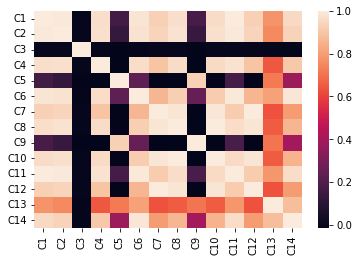

In [11]:
sns.heatmap(C_corr)

In [12]:
c_column_df.describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
count,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,14.092458,15.269734,0.005644,4.092185,5.571526,9.071082,2.848478,5.144574,4.480240,5.240343,10.241521,4.076227,32.539918,8.295215
std,133.569018,154.668899,0.150536,68.848459,25.786976,71.508467,61.727304,95.378574,16.674897,95.581443,94.336292,86.666218,129.364844,49.544262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000
75%,3.000000,3.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,12.000000,2.000000
max,4685.000000,5691.000000,26.000000,2253.000000,349.000000,2253.000000,2255.000000,3331.000000,210.000000,3257.000000,3188.000000,3188.000000,2918.000000,1429.000000


points - 
평균, 4분위수들은 엄청 작은데 max 값은 엄청 큼.. 이상치는 아닐까? 

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


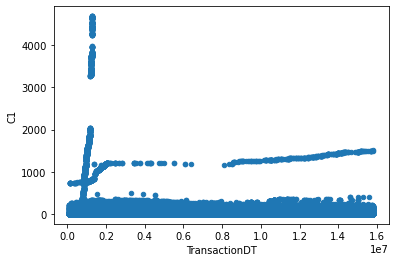

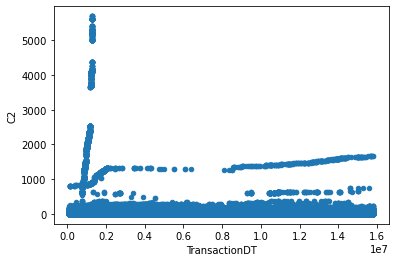

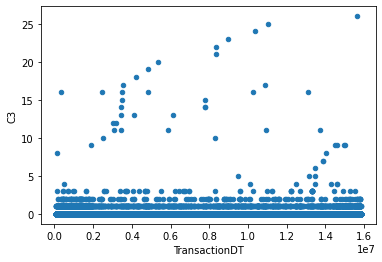

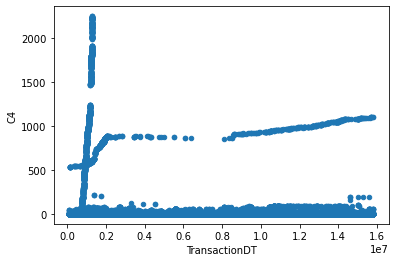

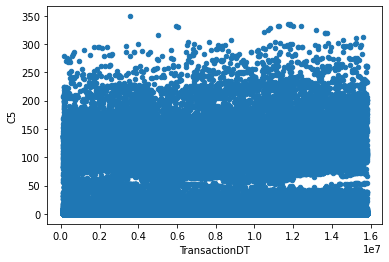

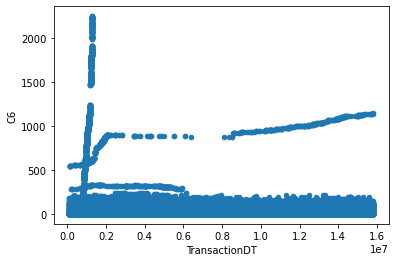

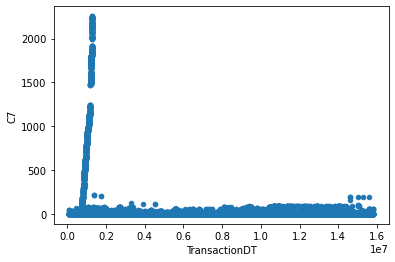

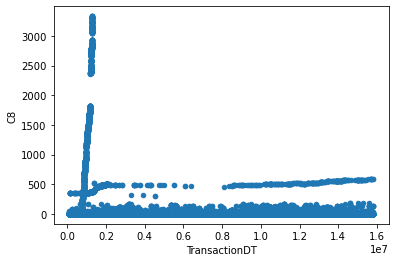

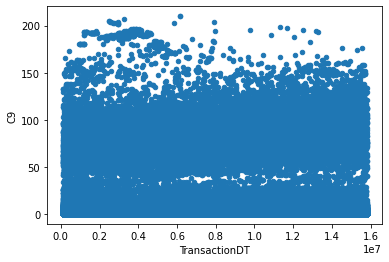

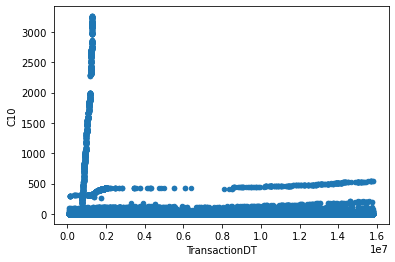

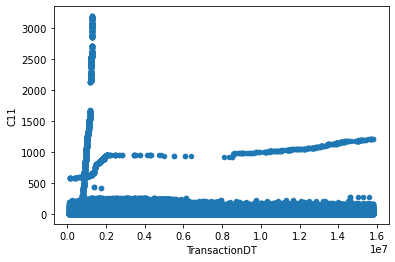

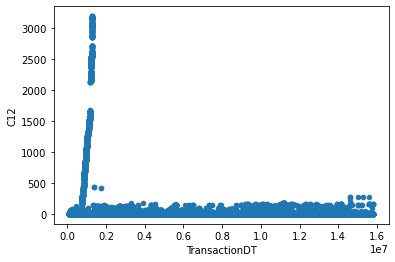

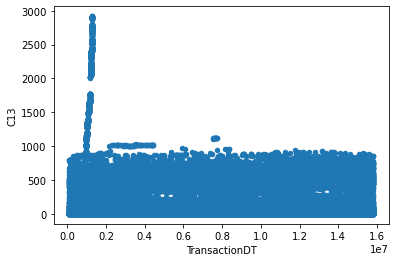

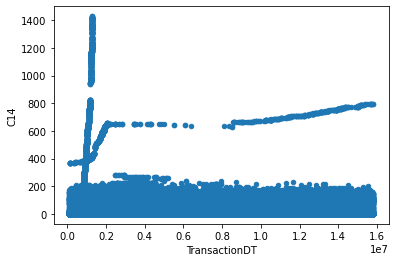

In [13]:
#컬럼 별 분포 확인
for i in range(1, 15):
    figures = train_transaction.plot( 'TransactionDT', f'C{i}',"scatter")
    
    print(figures)

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


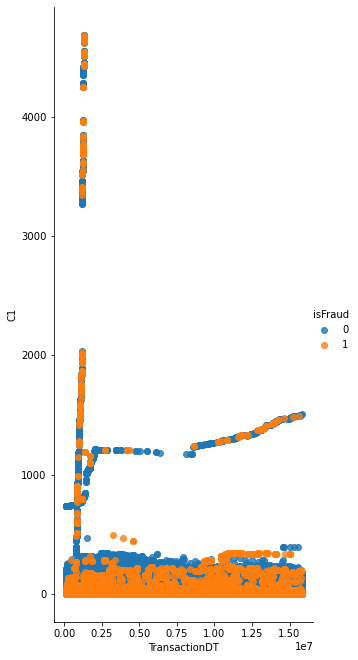

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


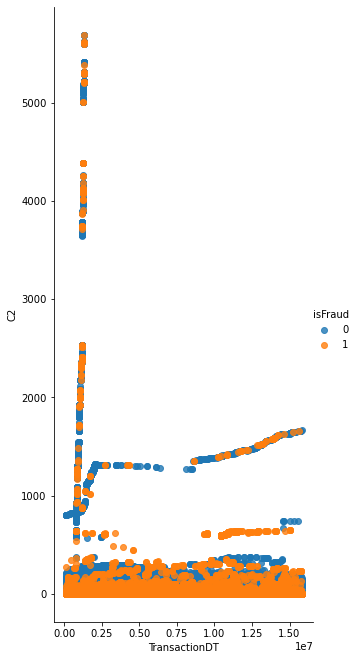

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


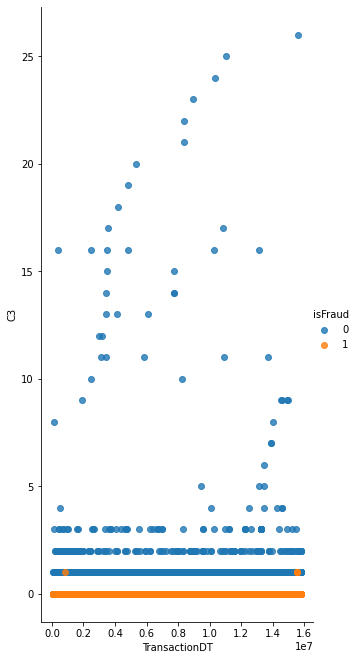

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


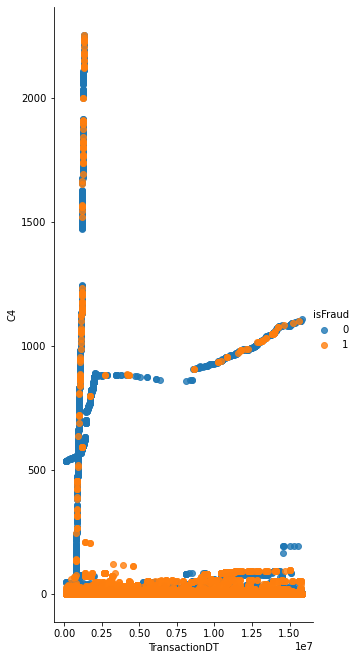

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


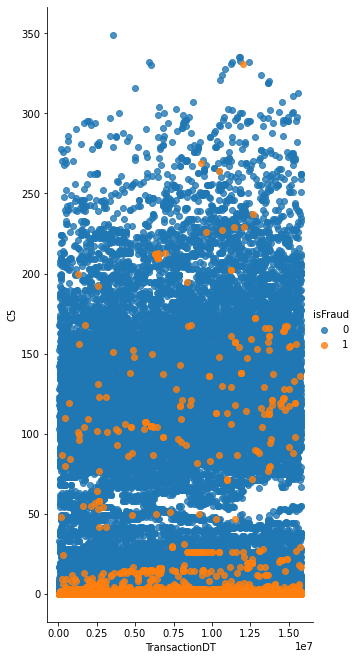

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


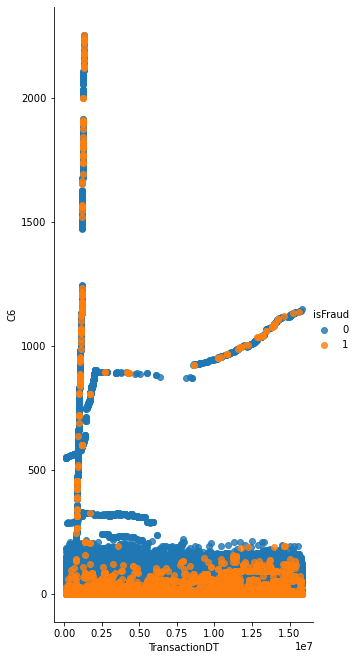

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


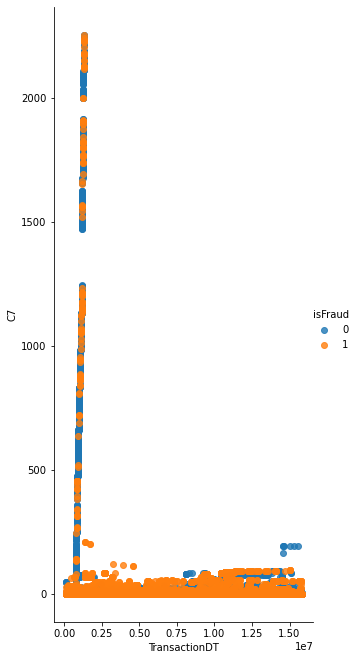

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


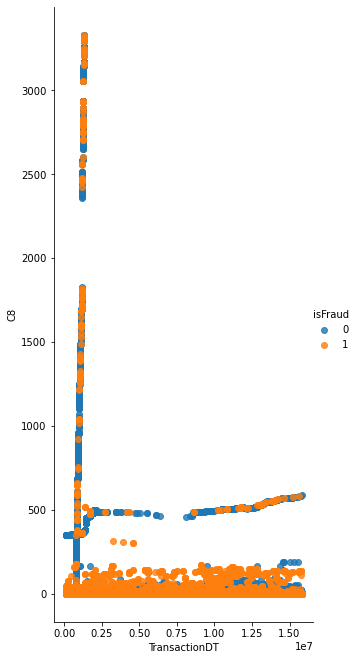

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


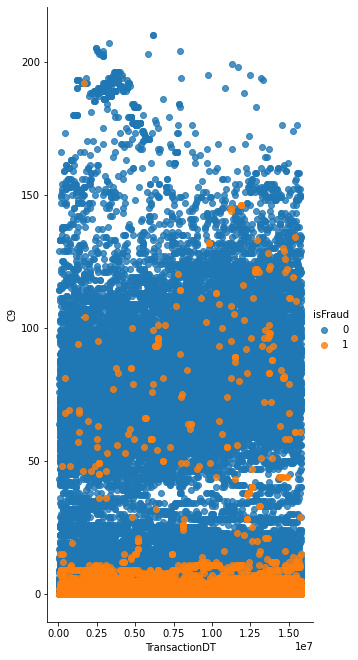

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


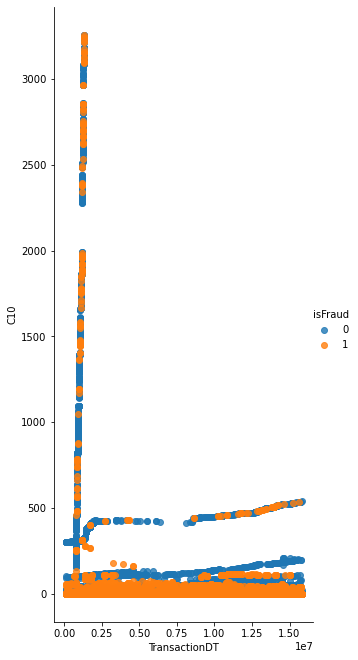

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


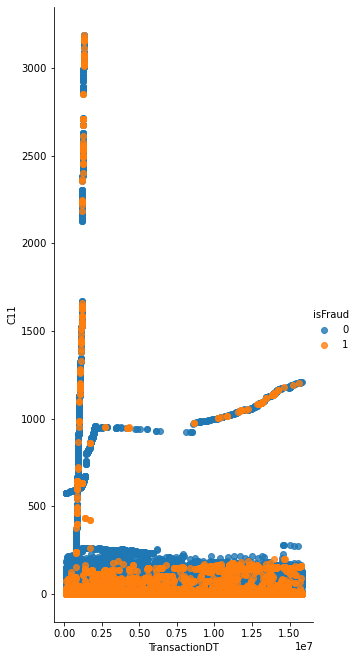

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


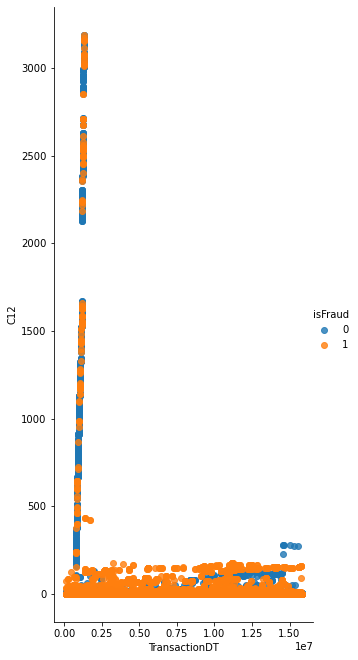

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


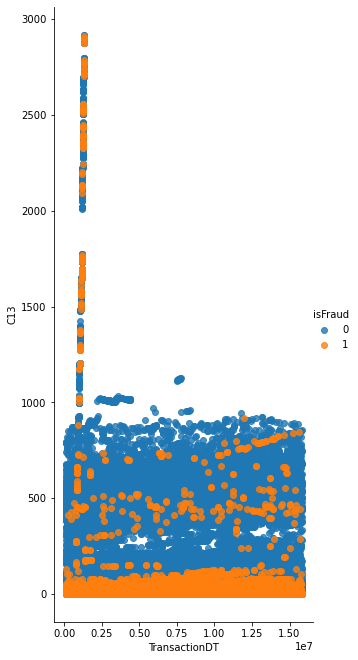

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


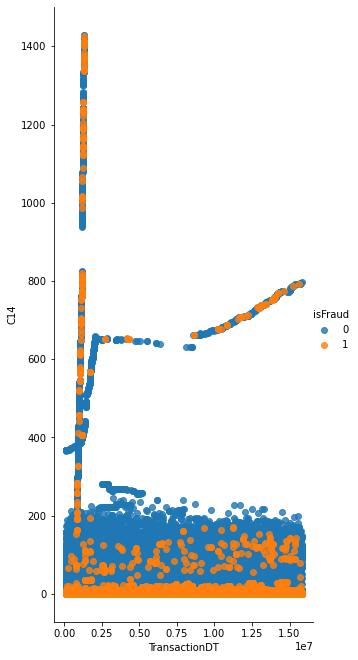

In [14]:
#graph trial - 결제 시각 & C-columns, 
for i in range(1, 15):
    sns.lmplot('TransactionDT', f'C{i}', train_transaction, hue='isFraud', fit_reg=False)
    fig = plt.gcf()
    fig.set_size_inches(5, 10)
    plt.show()

In [15]:
#graph trial - card colum & C-columns ?? 
card4_encoding = pd.get_dummies(train_transaction, columns = ['card4'])
card4_encoding

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,card4_american express,card4_discover,card4_mastercard,card4_visa
0,2987000,0,86400,68.50,W,13926,NaN,150.0,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,117.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0
1,2987001,0,86401,29.00,W,2755,404.0,150.0,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an e

<Figure size 432x288 with 0 Axes>

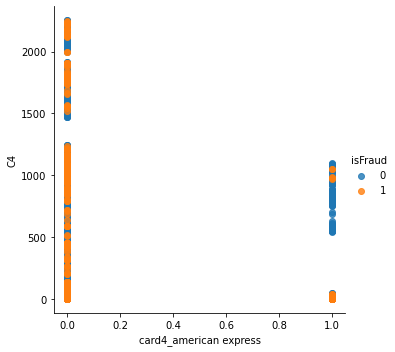

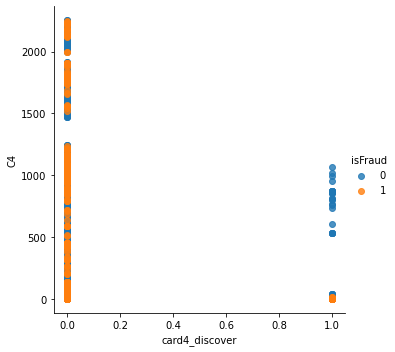

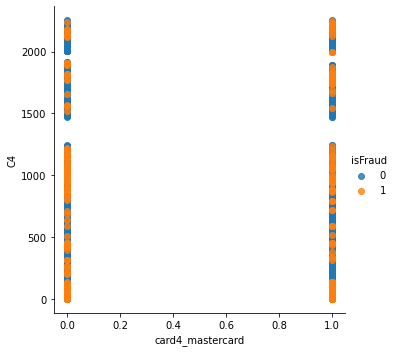

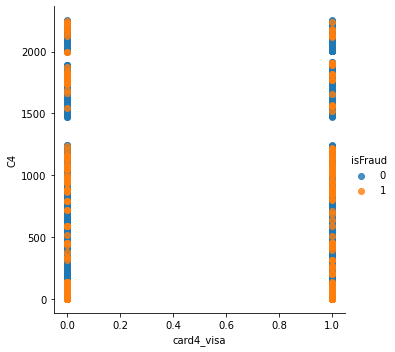

In [16]:
plt.figure()

sns.lmplot('card4_american express', 'C4', card4_encoding, hue='isFraud', fit_reg=False)
sns.lmplot('card4_discover', 'C4', card4_encoding, hue='isFraud', fit_reg=False)
sns.lmplot('card4_mastercard', 'C4', card4_encoding, hue='isFraud', fit_reg=False)
sns.lmplot('card4_visa', 'C4', card4_encoding, hue='isFraud', fit_reg=False)

fig.set_size_inches(5, 10)
plt.show()

In [17]:
#VIF 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF_table = pd.DataFrame({
    "VIF Factor": [variance_inflation_factor(c_column_df.values, idx) for idx in range(c_column_df.shape[1])],
    "features": c_column_df.columns,
})
VIF_table= VIF_table.sort_values('VIF Factor', ascending = False)
VIF_table

,VIF Factor,features
11,4195.722689,C12
6,2953.148577,C7
10,2313.900499,C11
7,1614.232379,C8
3,856.079141,C4
5,650.245064,C6
9,530.471117,C10
0,513.258502,C1
13,368.179637,C14
1,347.255671,C2


##### discussion of this block
사용할 feature / reason
- C2, C5, C13 : VIF 가 가장 낮은 하위 3개 column 
- C3, C5, C9 : TransactionDT, TransactionAmt 분포에서 isFraud 0 과 1 데이터의 분포가 다름 (그래프 참고)

2, 3, 5, 9, 13

In [18]:
list(VIF_table.index)

[11, 6, 10, 7, 3, 5, 9, 0, 13, 1, 8, 12, 4, 2]

In [19]:
#다중공선성 상위 컬럼 제거 
VIF_list= list(VIF_table.index+1)
c_column_df_2 = c_column_df.copy()
for i in (VIF_list[0:10]):
    c_column_df_try = c_column_df_2.drop(columns = f'C{i}')
    print(f'VIF without C{i} column')
    print('---------------')
    print(pd.DataFrame({
        "VIF Factor": [variance_inflation_factor(c_column_df_try.values, idx) for idx in range(c_column_df_try.shape[1])],
        "features": c_column_df_try.columns,
    }))
    c_column_df_2 = c_column_df_try
    print('---------------')

VIF without C12 column
---------------
     VIF Factor features
0    510.640419       C1
1    312.304149       C2
2      1.000599       C3
3    666.886306       C4
4     15.051982       C5
5    536.338087       C6
6    392.492650       C7
7   1387.978424       C8
8     65.161266       C9
9    497.780420      C10
10  1717.746324      C11
11    40.025995      C13
12   347.443902      C14
---------------
VIF without C7 column
---------------
     VIF Factor features
0    509.856229       C1
1    298.417673       C2
2      1.000377       C3
3    545.864800       C4
4     14.977470       C5
5    535.819676       C6
6    853.056811       C8
7     64.907933       C9
8    447.181814      C10
9   1711.823898      C11
10    39.712340      C13
11   346.284820      C14
---------------
VIF without C11 column
---------------
    VIF Factor features
0   488.113302       C1
1   245.034117       C2
2     1.000375       C3
3   526.965544       C4
4    14.883448       C5
5   379.357659       C6
6   748.8

C column selection based on VIF


|index|VIF Factor|features|   
|---|---|---|     
|0|13.191786|C2|   
|1|1.000056|C3|   
|2|12.684590|C5|   
|3|8.651003|C9|   
|4|28.550909|C13|   

or

|index|VIF Factor|features|   
|---|---|---|     
|0|1.000006|C3|
|1|7.701714|C5|
|2|7.491669|C9|
|3|2.216787|C13|

In [20]:
c_column_df_2[['isFraud']] = train_transaction[['isFraud']]

c_column_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   C3       590540 non-null  float64
 1   C5       590540 non-null  float64
 2   C9       590540 non-null  float64
 3   C13      590540 non-null  float64
 4   isFraud  590540 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 22.5 MB


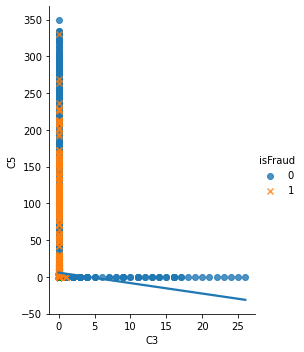

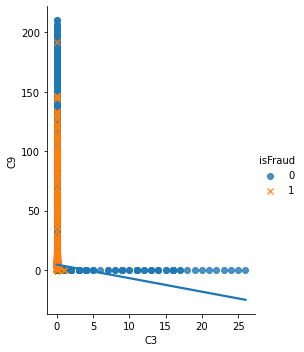

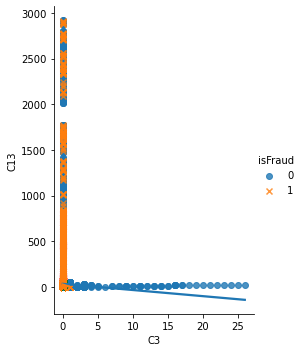

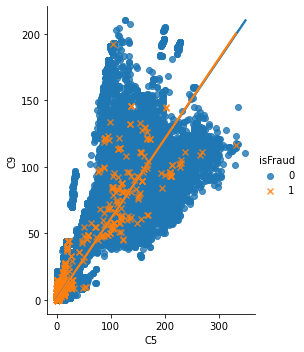

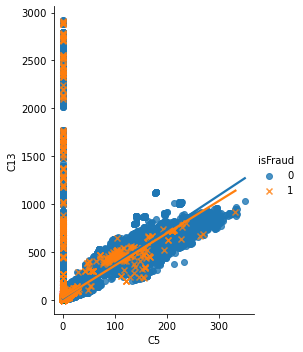

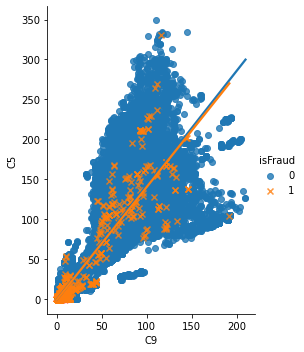

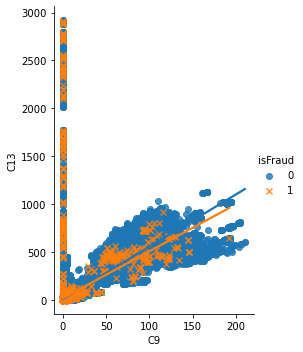

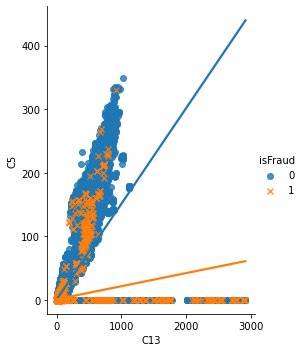

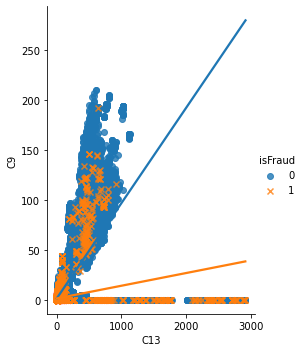

In [21]:
#scatter? 
for i in [3,5,9,13]:
    for j in [5,9,13]:
        if i == j :
            pass
        else: 
            g = sns.lmplot(x=f"C{i}", y=f"C{j}", aspect=0.75,
                hue="isFraud", markers=["o", "x"], ci=None, data=c_column_df_2)

            plt.show()

In [22]:
#PCA 함수
def apply_PCA(X, show_plot):
    from sklearn.decomposition import PCA
    # training data와 test data를 모두 PCA를 이용하여 차원 감소를 수행합니다.
    pca = PCA(n_components=0.90) # 원래 데이터의 90%를 보존하는 차원.
    pca_090 = pca.fit(X) # 학습 및 변환
    reduced_X = pca_090.transform(X)
    print(reduced_X.shape)
    
    if show_plot:
        labels = [f"PC{x}" for x in range(1, reduced_X.shape[1]+1)]
        pca_090_variance = np.round(pca_090.explained_variance_ratio_.cumsum()*100, decimals=1)
        plt.figure(figsize=(25,5))
        plt.bar(x=range(1, len(pca_090_variance)+1), height=pca_090_variance, tick_label=labels)

        plt.xticks(rotation=90, color='indigo', size=15)
        plt.yticks(rotation=0, color='indigo', size=15)
        plt.title('Scree Plot',color='tab:orange', fontsize=25)
        plt.xlabel('Principal Components', {'color': 'tab:orange', 'fontsize':15})
        plt.ylabel('Cumulative percentage of explained variance ', {'color': 'tab:orange', 'fontsize':15})
        plt.show()
        
        X_train_pca_df = pd.DataFrame(reduced_X, columns=labels)
        display(X_train_pca_df)

    return pca_090, X_train_pca_df

In [23]:
#scaling
c_column_df.describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
count,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,14.092458,15.269734,0.005644,4.092185,5.571526,9.071082,2.848478,5.144574,4.480240,5.240343,10.241521,4.076227,32.539918,8.295215
std,133.569018,154.668899,0.150536,68.848459,25.786976,71.508467,61.727304,95.378574,16.674897,95.581443,94.336292,86.666218,129.364844,49.544262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000
75%,3.000000,3.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,12.000000,2.000000
max,4685.000000,5691.000000,26.000000,2253.000000,349.000000,2253.000000,2255.000000,3331.000000,210.000000,3257.000000,3188.000000,3188.000000,2918.000000,1429.000000


(590540, 1)


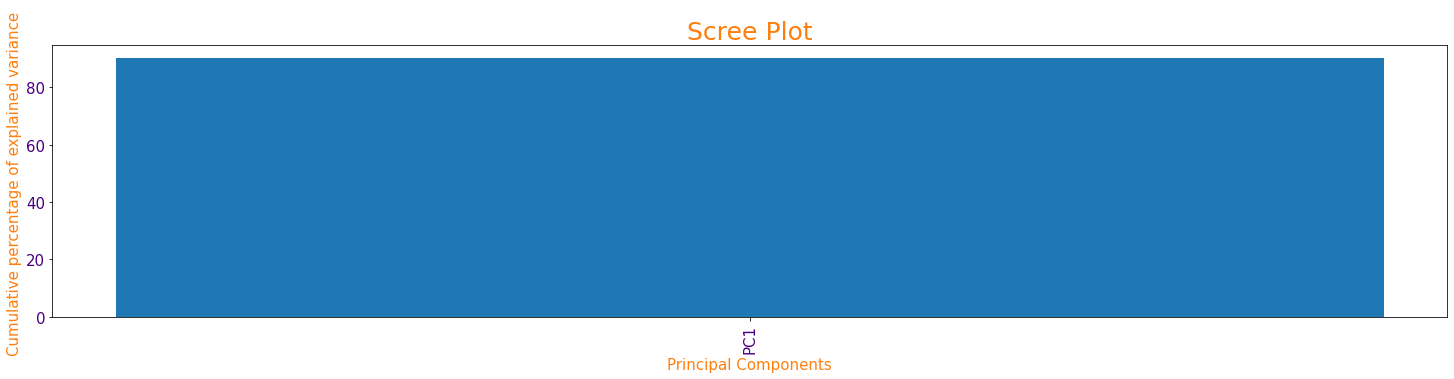

,PC1
0,-33.729029
1,-34.036720
2,-34.026521
3,-23.142320
4,-33.449334
...,...
590535,-32.997900
590536,-34.026521
590537,-34.011016
590538,-32.006763


(PCA(n_components=0.9),
               PC1
 0      -33.729029
 1      -34.036720
 2      -34.026521
 3      -23.142320
 4      -33.449334
 ...           ...
 590535 -32.997900
 590536 -34.026521
 590537 -34.011016
 590538 -32.006763
 590539 -33.579238
 
 [590540 rows x 1 columns])

In [24]:
apply_PCA(c_column_df, True)

#### 전처리 1 

In [25]:
#test/ train data 한번에 처리 필요

total = pd.concat([train_transaction, test_transaction]) 
split_point = len(train_transaction)

#drop
tempX = total.drop(columns=['C1', 'C2','C4','C6',  'C7',  'C8','C10', 'C11', 'C12', 'C14'])
tr_trans_pp = tempX[:split_point]
test_trans_pp = tempX[split_point:]
print(tr_trans_pp.shape, test_trans_pp.shape)



(590540, 384) (506691, 384)


#### D-columns

In [26]:
#D_corr
d_column_df = train_transaction[[f'D{i}' for i in range(1,16) ]]
d_corr = d_column_df.corr()
d_corr

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
D1,1.000000,0.981311,0.280423,0.585714,0.055236,0.525691,0.204924,0.050165,0.007667,0.562145,0.592629,0.521104,0.370195,0.154799,0.638957
D2,0.981311,1.000000,0.266112,0.570017,0.238365,0.601299,0.454152,0.275304,0.042867,0.525967,0.563220,0.668833,0.394203,0.196670,0.618243
D3,0.280423,0.266112,1.000000,0.149038,0.707425,0.304947,0.818080,0.194211,0.006983,0.092362,0.055433,0.349025,0.136444,0.029219,0.141511
D4,0.585714,0.570017,0.149038,1.000000,0.313650,0.956966,0.574098,0.162900,0.041768,0.636928,0.657797,0.999999,0.383803,0.135268,0.751546
D5,0.055236,0.238365,0.707425,0.313650,1.000000,0.551310,0.986496,0.249365,0.031991,0.116784,0.058496,0.565222,0.134026,0.064274,0.188533
D6,0.525691,0.601299,0.304947,0.956966,0.551310,1.000000,0.506527,0.185532,0.040119,0.463143,NaN,0.976834,0.419894,0.207166,0.700615
D7,0.204924,0.454152,0.818080,0.574098,0.986496,0.506527,1.000000,0.223624,0.025509,0.107557,NaN,0.553886,0.123023,0.035528,0.285026
D8,0.050165,0.275304,0.194211,0.162900,0.249365,0.185532,0.223624,1.000000,0.066085,0.168607,NaN,0.157520,0.521432,0.080991,0.226635
D9,0.007667,0.042867,0.006983,0.041768,0.031991,0.040119,0.025509,0.066085,1.000000,0.063333,NaN,0.026858,0.024555,0.042368,0.054647
D10,0.562145,0.525967,0.092362,0.636928,0.116784,0.463143,0.107557,0.168607,0.063333,1.000000,0.609652,0.018188,0.277137,0.336933,0.712252


<AxesSubplot:>

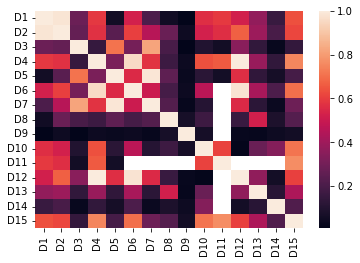

In [27]:
sns.heatmap(d_corr)

In [28]:
def cut_column_50(df):
    identity_name = []
    for i in range(0, len(df.iloc[0,:]) ):
        if (df.iloc[:, i].isnull().sum() / len(df.iloc[:, 0])) < 0.5:
            identity_name.append(df.iloc[:, i].name)
    df = df[identity_name]
    return df
    print(df.info())


d_column_df_2 = cut_column_50(d_column_df)
d_column_df_2

,D1,D2,D3,D4,D10,D11,D15
0,14.0,NaN,13.0,NaN,13.0,13.0,0.0
1,0.0,NaN,NaN,0.0,0.0,NaN,0.0
2,0.0,NaN,NaN,0.0,0.0,315.0,315.0
3,112.0,112.0,0.0,94.0,84.0,NaN,111.0
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
590535,29.0,29.0,30.0,NaN,56.0,56.0,56.0
590536,0.0,NaN,NaN,0.0,0.0,0.0,0.0
590537,0.0,NaN,NaN,0.0,0.0,0.0,0.0
590538,22.0,22.0,0.0,22.0,22.0,22.0,22.0


In [29]:
#각 컬럼별 scale 보기
d_column_df_2.describe()

,D1,D2,D3,D4,D10,D11,D15
count,589271.000000,309743.000000,327662.000000,421618.000000,514518.000000,311253.000000,501427.000000
mean,94.347568,169.563231,28.343348,140.002441,123.982137,146.621465,163.744579
std,157.660387,177.315865,62.384721,191.096774,182.615225,186.042622,202.726660
min,0.000000,0.000000,0.000000,-122.000000,0.000000,-53.000000,-83.000000
25%,0.000000,26.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,97.000000,8.000000,26.000000,15.000000,43.000000,52.000000
75%,122.000000,276.000000,27.000000,253.000000,197.000000,274.000000,314.000000
max,640.000000,640.000000,819.000000,869.000000,876.000000,670.000000,879.000000


/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


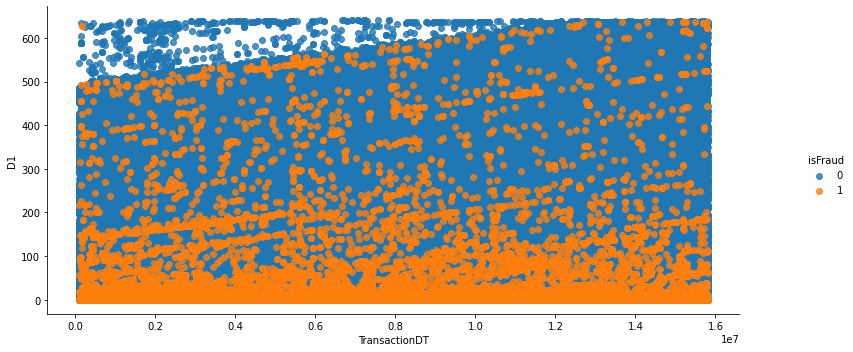

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


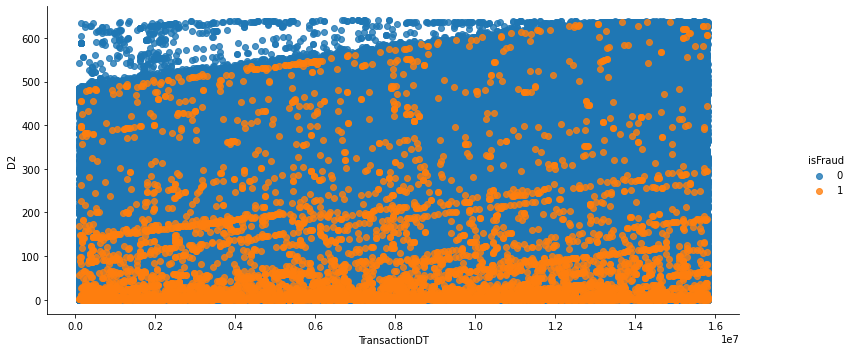

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


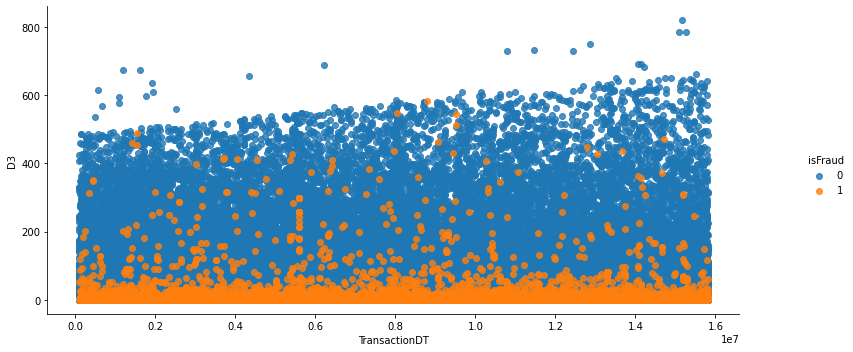

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


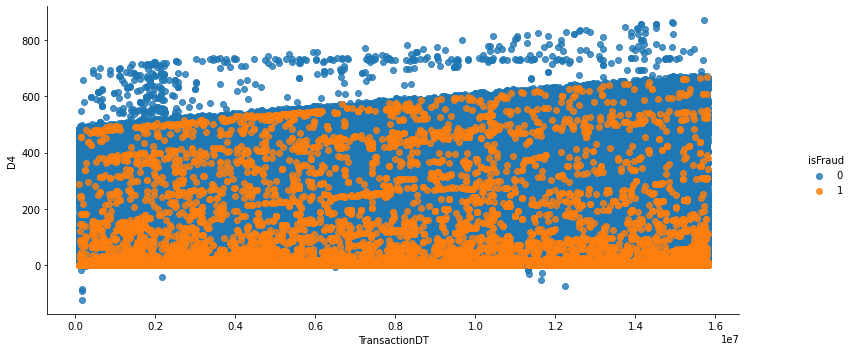

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


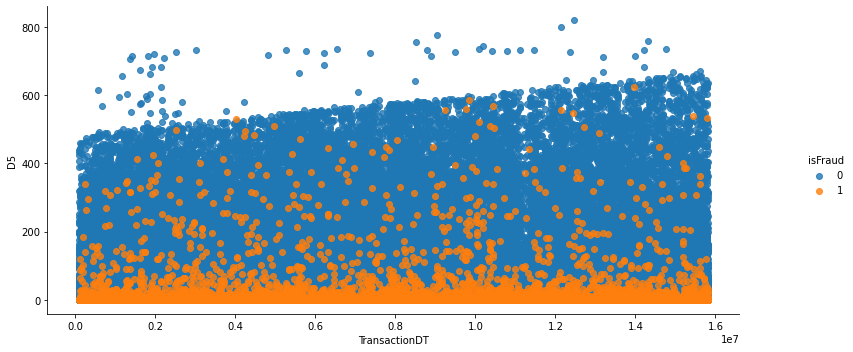

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


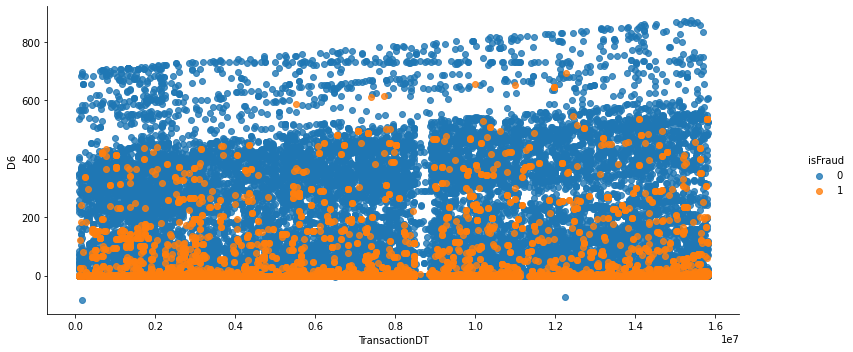

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


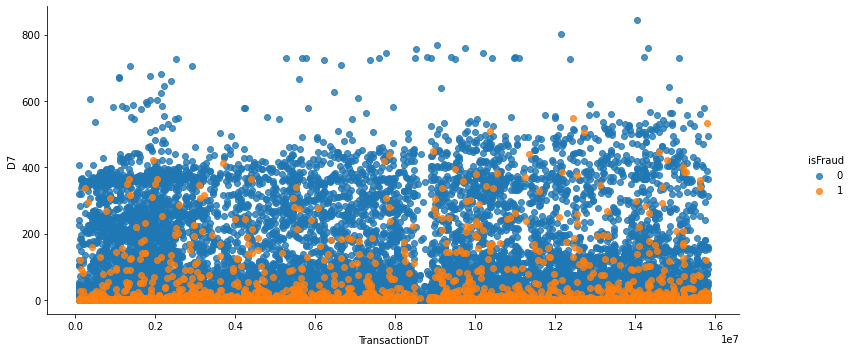

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


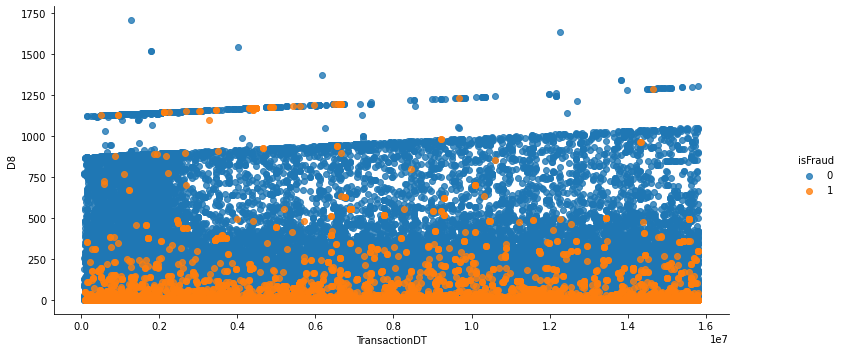

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


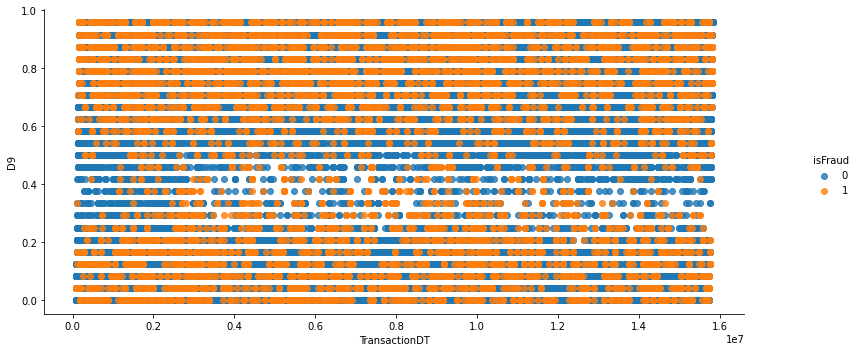

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


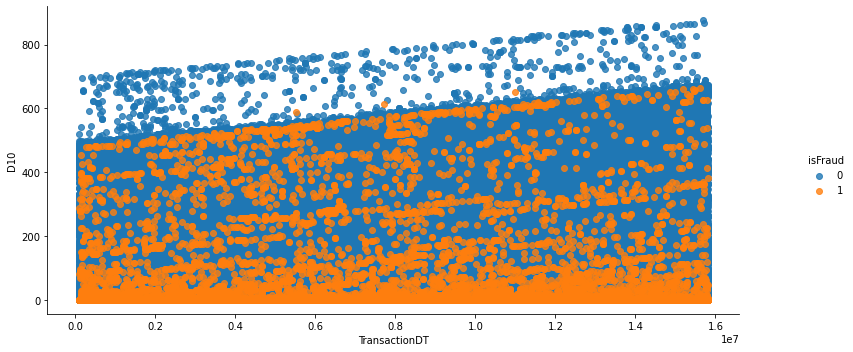

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


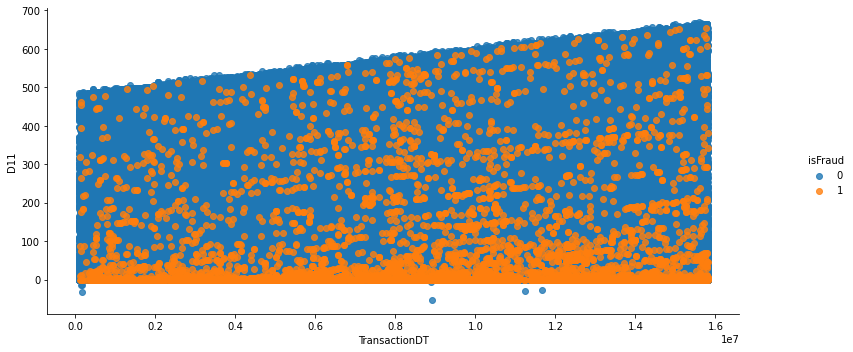

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


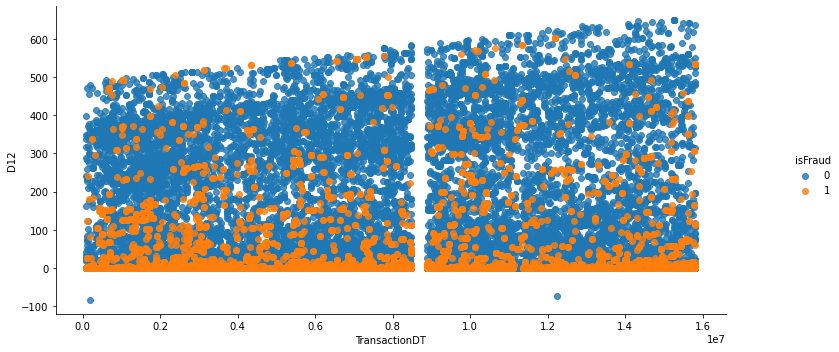

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


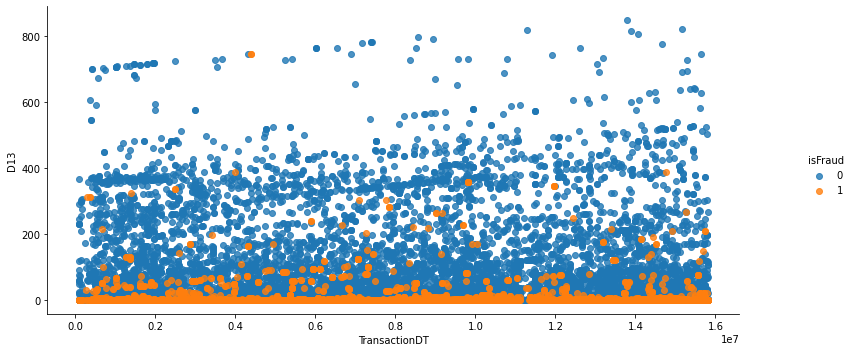

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


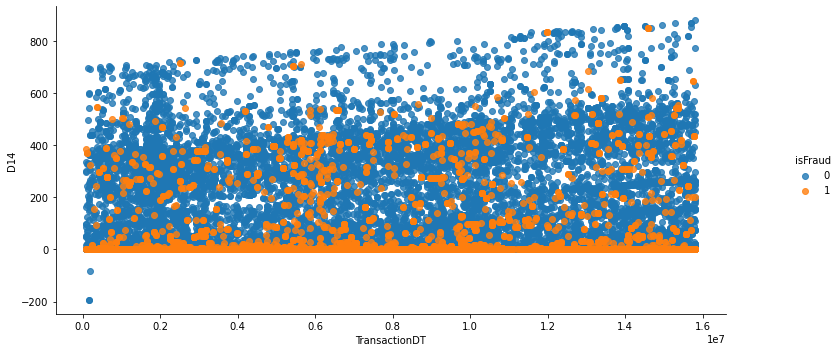

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


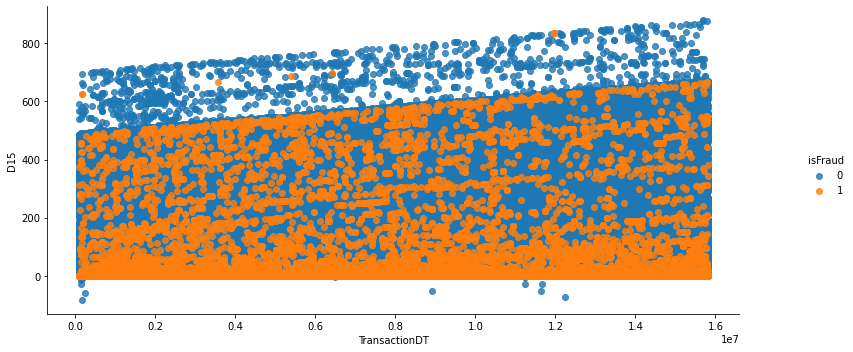

In [32]:
#graph trial - DT & D columns
for i in range(1, 16):
    sns.lmplot('TransactionDT',f'D{i}',  train_transaction, hue='isFraud', fit_reg=False)
    fig = plt.gcf()
    fig.set_size_inches(13, 5)
    plt.show()

D4, D6, D10, D13, D15 : 1차함수로 isfraud  구별 가능 

In [35]:
#drop 없이 VIF 보기 
d_column_df_nona_1 = d_column_df.fillna(-999)

In [37]:
#다중공선성 확인 - 결측치 중간값으로 채운 값 
pd.DataFrame({
    "VIF Factor": [variance_inflation_factor(d_column_df_nona_1.values, idx) for idx in range(d_column_df_nona_1.shape[1])],
    "features": d_column_df_nona_1.columns,
})

,VIF Factor,features
0,2.574113,D1
1,7.968583,D2
2,8.198815,D3
3,3.733960,D4
4,6.252770,D5
5,57.464720,D6
6,35.845012,D7
7,127.535787,D8
8,175.729384,D9
9,3.469885,D10


In [36]:

VIF_list= list(VIF_table.index+1)
d_column_df_2 = d_column_df_nona_1.copy()
for i in (VIF_list[0:10]):
    d_column_df_try = d_column_df_2.drop(columns = f'D{i}')
    print(f'VIF without D{i} column')
    print('---------------')
    print(pd.DataFrame({
        "VIF Factor": [variance_inflation_factor(d_column_df_try.values, idx) for idx in range(d_column_df_try.shape[1])],
        "features": d_column_df_try.columns,
    }))
    d_column_df_2 = d_column_df_try
    print('---------------')

VIF without D2 column
---------------
    VIF Factor features
0     1.846024       D1
1     3.521508       D3
2     3.718500       D4
3     6.232626       D5
4    57.400602       D6
5    35.840023       D7
6   127.333793       D8
7   174.987218       D9
8     3.469792      D10
9     2.006132      D11
10   57.270579      D12
11   54.540383      D13
12   25.547143      D14
13    4.074790      D15
---------------
VIF without D3 column
---------------
    VIF Factor features
0     1.661233       D1
1     3.285294       D4
2     4.917924       D5
3    56.996102       D6
4    35.549352       D7
5   126.771216       D8
6   174.179756       D9
7     3.327448      D10
8     1.990623      D11
9    57.235156      D12
10   54.335433      D13
11   25.546923      D14
12    4.041159      D15
---------------
VIF without D7 column
---------------
    VIF Factor features
0     1.649244       D1
1     3.005058       D4
2     3.864444       D5
3    44.305445       D6
4   121.738356       D8
5   158.865818

In [33]:
#결측치 50% 이상인 컬럼 버리고 -999로 채워주기  

d_column_df_nona = d_column_df_2.fillna(-999)


In [34]:
#fillna with -999 
VIF_table = pd.DataFrame({
    "VIF Factor": [variance_inflation_factor(d_column_df_nona.values, idx) for idx in range(d_column_df_nona.shape[1])],
    "features": d_column_df_nona.columns,
})
VIF_table= VIF_table.sort_values('VIF Factor', ascending = False)
VIF_table

,VIF Factor,features
1,7.344233,D2
2,7.246538,D3
6,3.839989,D15
4,3.163751,D10
3,1.749355,D4
0,1.744244,D1
5,1.686416,D11


##### discussion of this block
사용할 feature / reason
- 1, 2, 3, 11, 10, 15 :    
데이터 50% 이상, 각 컬럼간 VIF 10 이하 (결측치 -999로 채움)

In [73]:
#isFraud 컬럼 추가 
d_column_df_nona['isFraud'] = train_transaction['isFraud']
d_column_df_nona.info(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   D1       590540 non-null  float64
 1   D2       590540 non-null  float64
 2   D3       590540 non-null  float64
 3   D4       590540 non-null  float64
 4   D10      590540 non-null  float64
 5   D11      590540 non-null  float64
 6   D15      590540 non-null  float64
 7   isFraud  590540 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 36.0 MB


#### 전처리 2

In [61]:
#column drop 

total = pd.concat([tr_trans_pp, test_trans_pp]) 
split_point = len(train_transaction)

#drop
tempX = total.drop(columns=['D4','D5', 'D6', 'D7', 'D8','D9', 'D12', 'D13','D14'])
tr_trans_pp = tempX[:split_point]
test_trans_pp = tempX[split_point:]
print(tr_trans_pp.head(), test_trans_pp.shape)

   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000      0.0          86400            68.5         W  13926   
1        2987001      0.0          86401            29.0         W   2755   
2        2987002      0.0          86469            59.0         W   4663   
3        2987003      0.0          86499            50.0         W  18132   
4        2987004      0.0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338  V339  
0  NaN   NaN   NaN   NaN  
1  NaN   NaN   NaN  

#### 0610 전처리 데이터 save

In [94]:
#tr_trans_pp.to_csv('0610_fraud_pp_ver1', index=False) 

#### V-columns

In [74]:
v_column_df = train_transaction[[f'V{i}' for i in range(1,339) ]]
v_corr = v_column_df.corr()
v_corr

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338
V1,1.000000,0.032168,0.024830,0.014216,0.013619,0.032284,0.026016,0.040820,0.034009,0.006574,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V2,0.032168,1.000000,0.773039,0.318554,0.305504,0.621459,0.496921,0.732730,0.618591,0.036884,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V3,0.024830,0.773039,1.000000,0.243684,0.353767,0.472570,0.546875,0.556536,0.653087,-0.005272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V4,0.014216,0.318554,0.243684,1.000000,0.915164,0.279596,0.221621,0.325873,0.273207,-0.013160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V5,0.013619,0.305504,0.353767,0.915164,1.000000,0.261490,0.294447,0.308716,0.354257,-0.035405,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.040477,0.046645,0.060796,0.051947,0.064307,1.000000,0.703988,0.906312,0.041888,0.054911
V335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.667052,0.647561,0.593782,0.647208,0.657350,0.703988,1.000000,0.914130,0.166021,0.552533
V336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.416870,0.412448,0.389508,0.410970,0.425812,0.906312,0.914130,1.000000,0.118221,0.353950
V337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.221552,0.245626,0.309989,0.259108,0.295698,0.041888,0.166021,0.118221,1.000000,0.742652


In [97]:
v_column_df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338
count,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,421571.000000,421571.000000,421571.000000,421571.00000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,590226.000000,590226.00000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,81945.000000,81945.000000,81945.000000,81945.000000,81945.000000,81951.000000,81951.000000,81951.000000,81945.000000,81945.000000,81945.000000,81945.000000,81951.000000,81951.000000,81951.000000,81945.000000,81945.000000,81945.000000,81945.000000,81945.000000,81945.000000,81951.000000,81951.000000,81945.000000,81945.000000,81945.000000,81951.000000,81951.000000,81951.000000,139631.000000,139631.000000,139819.000000,139819.000000,139819.000000,139631.000000,139631.000000,139819.000000,139819

In [73]:

def cut_column_80(df):
    identity_name = []
    for i in range(0, len(df.iloc[0,:]) ):
        if (df.iloc[:, i].isnull().sum() / len(df.iloc[:, 0])) < 0.2:
            identity_name.append(df.iloc[:, i].name)
    df = df[identity_name]
    return df
    print(df.info())


v_column_df_2 = cut_column_80(total)
v_column_df_2


""
0
1
2
3
4
...
506686
506687
506688
506689


In [23]:
v_column_df_2.describe()

,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
count,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,...,590528.000000,589271.000000,589271.000000,589271.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000
mean,0.559711,0.599166,0.999500,0.122342,0.123460,0.134040,0.135363,0.816371,0.847843,0.129684,...,39.173910,21.351473,43.319174,26.806977,109.818544,247.606741,162.153398,18.372476,42.073133,28.326584
std,0.510533,0.532185,0.022345,0.332422,0.342841,0.364456,0.371763,0.425512,0.459451,0.339060,...,172.128339,95.902970,173.619028,116.853222,2270.033202,3980.042828,2793.343636,332.304848,473.499307,382.053171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,6.000000,1.000000,7.000000,15.000000,15.000000,15.000000,7.000000,15.000000,5.000000,...,55125.000000,4817.470215,7519.870117,4817.470215,93736.000000,134021.000000,98476.000000,104060.000000,104060.000000,104060.000000


In [35]:
v_column_df_2.columns

Index(['V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=151)

In [36]:
#nunique 가 평균값 개 이하인 column 들은 범주형일 것으로 추측
# median = 32개 이상인 numerical column만 사용하자
more_than_mean_vlist = []
for i in v_column_df_2.columns :
    if v_column_df_2[i].nunique() > 32: #np.median(v_column_df.nunique()) = 32
        more_than_mean_vlist.append(i)
print(more_than_mean_vlist)

['V56', 'V95', 'V96', 'V97', 'V99', 'V101', 'V102', 'V103', 'V105', 'V106', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V279', 'V280', 'V282', 'V283', 'V285', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V298', 'V299', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321']


In [37]:
num_colums_v = train_transaction.loc[:,more_than_mean_vlist]
num_colums_v

,V56,V95,V96,V97,V99,V101,V102,V103,V105,V106,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,1.0,1.0,48.0,28.0,10.0,1.0,38.0,24.0,0.0,0.0,...,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000
4,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000
590536,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590537,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590538,1.0,1.0,4.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,...,117.0,317.500000,669.500000,317.500000,0.0,2234.0,0.0,0.000000,0.000000,0.000000


<AxesSubplot:>

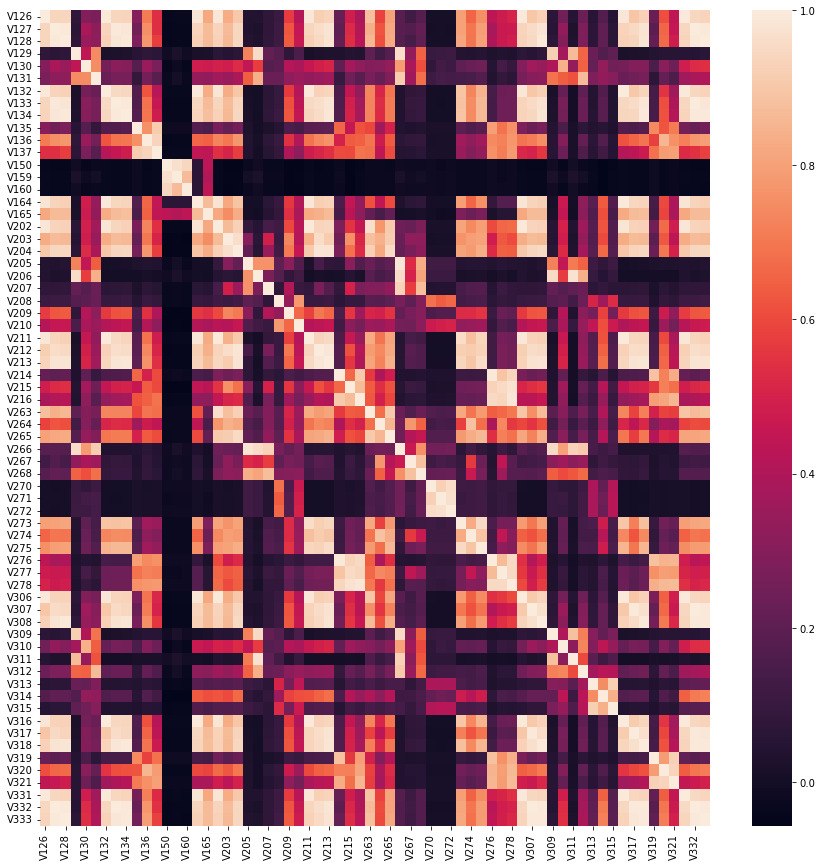

In [28]:
#corr heatmap 
plt.figure(figsize=(15,15))
sns.heatmap(train_transaction.loc[:,more_than_mean_vlist].corr())

In [41]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

v2_scaled_data = scaler.fit_transform(num_colums_v)

In [58]:
v_column_mmscale = pd.DataFrame(v2_scaled_data, columns=num_colums_v.columns, index=list(num_colums_v.index.values))
v_column_mmscale.head()

,V56,V95,V96,V97,V99,V101,V102,V103,V105,V106,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,0.019608,0.000000,0.000709,0.000000,0.000000,0.000000,0.000778,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000873,0.000000,0.0,0.0,0.0
1,0.019608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.019608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.019608,0.001136,0.034043,0.028689,0.113636,0.001151,0.029572,0.025862,0.0,0.0,...,0.002449,0.0,0.0,0.0,0.000533,0.010476,0.008022,0.0,0.0,0.0
4,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [49]:
#선별된 V columns들 중 VIF 확인
imsi = v_column_mmscale.dropna()

VIF_table = pd.DataFrame({
    "VIF Factor": [variance_inflation_factor(imsi.values, idx) for idx in range(imsi.shape[1])],
    "features": imsi.columns,
})

VIF_table

,VIF Factor,features
0,3.084236e+00,V56
1,1.903037e+04,V95
2,2.738150e+06,V96
3,1.384849e+04,V97
4,1.289830e+04,V99
5,2.287898e+04,V101
6,2.181401e+06,V102
7,2.106172e+04,V103
8,1.930617e+04,V105
9,2.151295e+02,V106


In [52]:
VIF_table = VIF_table.sort_values('VIF Factor', ascending = False)
VIF_table.head()

,VIF Factor,features
12,2.268576e+07,V128
18,1.943319e+07,V134
10,1.421913e+07,V126
16,1.346039e+07,V132
2,2.738150e+06,V96


In [57]:
# 생각한 순서대로 돌아가지 X 

VIF_list= list(VIF_table.features)
v_column_df_2 = imsi.copy()
for i in VIF_list:
    for i in (VIF_list[0:40]):
        v_column_df_try = v_column_df_2.drop(columns = i)
        print(f'VIF without {i} column')
        print('---------------')
        print(pd.DataFrame({
            "VIF Factor": [variance_inflation_factor(v_column_df_try.values, idx) for idx in range(v_column_df_try.shape[1])],
            "features": v_column_df_try.columns,
        }))
        v_column_df_2 = v_column_df_try
        print('---------------')
    

VIF without V128 column
---------------
      VIF Factor features
0   3.084235e+00      V56
1   1.902826e+04      V95
2   2.592885e+06      V96
3   1.384720e+04      V97
4   1.221304e+04      V99
5   2.287642e+04     V101
6   2.066007e+06     V102
7   2.105950e+04     V103
8   1.829526e+04     V105
9   2.151287e+02     V106
10  7.999357e+05     V126
11  1.885267e+04     V127
12  1.746618e+03     V129
13  1.362068e+02     V130
14  1.977358e+01     V131
15  7.588047e+05     V132
16  1.760655e+04     V133
17  3.196370e+03     V134
18  8.375356e+03     V135
19  3.497959e+02     V136
20  1.785060e+02     V137
21  1.645329e+04     V279
22  1.096256e+04     V280
23  3.928203e+00     V282
24  3.841603e+00     V283
25  1.760509e+01     V285
26  7.213526e+00     V290
27  3.963215e+00     V291
28  8.243411e+00     V292
29  1.781624e+04     V293
30  2.177125e+03     V294
31  1.623897e+04     V295
32  1.205185e+02     V296
33  3.123224e+02     V298
34  1.571806e+02     V299
35  1.034824e+06     V30

       VIF Factor features
0        3.078341      V56
1    18808.164747      V95
2    13746.478048      V97
3       16.520510      V99
4    19954.033678     V101
5    14982.164039     V103
6      237.406403     V105
7      212.205620     V106
8    18209.027957     V127
9       15.966022     V129
10     133.641752     V130
11      19.124967     V131
12   15181.669961     V133
13      66.865533     V135
14     343.302506     V136
15     178.039225     V137
16   16346.508255     V279
17   10898.394859     V280
18       3.873154     V282
19       3.707900     V283
20      17.343134     V285
21       7.061671     V290
22       3.701380     V291
23       7.665138     V292
24   16301.228606     V293
25     250.530701     V294
26   12174.254902     V295
27     119.391836     V296
28     312.234824     V298
29     155.952816     V299
30  396452.523561     V306
31  652517.215425     V307
32     925.728956     V309
33    4946.648108     V310
34       5.726427     V311
35      17.770080     V312
3

      VIF Factor features
0       3.066539      V56
1   13602.451577      V95
2    8639.682285      V97
3      13.001752      V99
4   15295.350187     V101
5   10082.737959     V103
6     139.550686     V105
7     128.339690     V106
8   17592.683002     V127
9     119.732189     V130
10  14331.586522     V133
11    193.876405     V136
12  13667.812069     V279
13   8605.345923     V280
14      3.845916     V282
15      3.699445     V283
16     14.926183     V285
17      6.978664     V290
18      3.683996     V291
19      7.551121     V292
20  13831.699675     V293
21    215.101806     V294
22   9760.581679     V295
23    118.980820     V296
24    283.413703     V298
25    125.159403     V299
26      7.583307     V309
27     11.660987     V310
28      5.186204     V311
29      7.384573     V312
30      7.483361     V313
31      4.372529     V314
32     11.593882     V315
33     19.527719     V319
34     43.648189     V320
35     52.125582     V321
---------------
VIF without V101 colum

KeyboardInterrupt: 

##### discussion of this block
- 결측치 20% 이하 
- 32개 이상인 numerical column 만 사용
- MinMax scaling

#### 전처리 3

In [70]:
#스케일링은 test랑 합쳐서 해야했는데.. 

tempX = tr_trans_pp.iloc[:,:36]
right = v_column_mmscale
tr_trans_pp = pd.concat([tempX, right]) 
tr_trans_pp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1771620 entries, 0 to 590539
Data columns (total 88 columns):
 #   Column          Dtype  
---  ------          -----  
 0   TransactionID   float64
 1   isFraud         float64
 2   TransactionDT   float64
 3   TransactionAmt  float64
 4   ProductCD       object 
 5   card1           float64
 6   card2           float64
 7   card3           float64
 8   card4           object 
 9   card5           float64
 10  card6           object 
 11  addr1           float64
 12  addr2           float64
 13  dist1           float64
 14  dist2           float64
 15  P_emaildomain   object 
 16  R_emaildomain   object 
 17  C3              float64
 18  C5              float64
 19  C9              float64
 20  C13             float64
 21  D1              float64
 22  D2              float64
 23  D3              float64
 24  D10             float64
 25  D11             float64
 26  D15             float64
 27  M1              object 
 28  M2           

In [71]:
#tr_trans_pp.to_csv('0614_fraud_pp_ver3', index=False) 

#### M-columns

---

### 결측치 처리 방법 고민중 . . . 

- 평균 +/- 분산 -> 범위안에서 랜덤으로 선택
- 0 또는 지정된 숫자로 nan값을 채울 수가 있음 -> -999로 채우는 예시
	- 예) 전체 컬럼의 값이 0, 1, nan입니다. nan = -999로 채우면...
	 -> encoding: 0 -> 1 0 0 , 1 -> 0 1 0 ...
- 해당 컬럼의 이전값 또는 이후값으로 nan값을 채울 수 있음
- EDA를 통해서도 컬럼값을 채울 수 있음

In [ ]:
#결측치 확인 - email domain까지의 column 정보 보기
#transaction : 590540 
train_transaction.iloc[:,:55].info()

In [ ]:
#결측치 처리할 tr_trans 생성
#이메일 도메인까지 = 17
#M9까지 = 55 
tr_trans = train_transaction.iloc[:,:55]
tr_trans

In [ ]:
#구매자 이메일 도메인 & isfraud 간의 상관관계 
train_transaction.groupby('P_emaildomain').mean().sort_values('isFraud')

In [ ]:
#시간대 변환 
tr_trans['DateTime'] = ((tr_trans.TransactionDT/3600)%24).astype(int) 
tr_trans.info()

In [ ]:
tr_trans.DateTime.unique() #country code? 

In [ ]:
tr_trans.iloc[:,17]

In [ ]:
#결측 비율 10% 이하만 데려오기 
trans_name = []
for i in range(1, 55):
    if ( tr_trans.iloc[:,i].isna().sum() / len(tr_trans.iloc[:,0]) ) < 0.1:
        trans_name.append(tr_trans.iloc[:,i].name)
trans_name.insert(0,'TransactionID')
tr_trans = tr_trans[trans_name]
tr_trans.info()

In [ ]:
#test for module
'''
def cut_column_90(df):
    identity_name = []
    for i in range(2, len(df.iloc[0,:]) ):
        if (df.iloc[:, i].isnull().sum() / len(df.iloc[:, 0])) < 0.1:
            identity_name.append(df.iloc[:, i].name)
    identity_name.insert(0, train_transaction.iloc[:, 0].name)
    df = df[identity_name]
    return df
    print(df.info())
cut_column_90(train_transaction)'''

In [ ]:
#결측치 있는 row 채울 방법이 마땅치 않음 - 578245 row 
tr_trans = tr_trans.dropna()
tr_trans.info()

--- 

transaction으로만 EDA? 
이유 
 - identity column info 가 부족해서 merge 로 해서 얻을 수 있는 정보가 한정적 
 - indentity table의 결측치가 너무 많아 merge한 이후의 데이터만 사용하면 손실이 너무 큼 

In [ ]:
tr_trans.describe()


points 

In [ ]:
tr_trans.describe(include=['O'])

- ProductCD 의 결측치는 W 로 채워도 무방할듯함 (뭘 뜻하는진 모르겠지만..)
-  card 4와 card6도 freq가 꽤 높지만, 카드 브랜드 혹은 체크카드/신용카드에 대한 분류이기 때문에 채우기 애매해보임 

---

In [ ]:
#identity table 전처리 
train_identity.info()

In [ ]:
#identity table 전처리 - 살릴 column만 데려오기 
#기준: 결측치 10% 미만 
identity_name = []
for i in range(1, 41):
    if ( train_identity.iloc[:,i].isnull().sum() / len(train_identity.iloc[:,0]) ) <  0.1 :
        identity_name.append(train_identity.iloc[:,i].name)
identity_name.insert(0,'TransactionID')
tr_id = train_identity[identity_name]
tr_id.info()

In [ ]:
#결측치 일단 지워보기 - 136382 row 
tr_id = tr_id.dropna()
tr_id.info()

In [ ]:
#tr table들 join - 67233 row 남음ㅎ
tr_join = pd.merge(left = tr_trans, right =  tr_id , how = "inner", on = "TransactionID")
tr_join.info()

In [ ]:
tr_trans.corr()

In [ ]:
sns.heatmap(tr_trans.corr())

In [ ]:
#C value 들간 상관계수가 심상치 않아보인다 - 상관계수가 높은 것들은 제거 가능 
tr_trans[[f'C{i}' for i in range(1,15) ]].corr()

In [ ]:
#상관계수 다 돌려보기 - 0.5 이상인 column filtering.. 실패
'''for i in range(2, 32):
    X = tr_join.iloc[:,1]
    Y = tr_join.iloc[:,i]
    if type(Y[1]) == str :
        pass
    corr_temp= np.corrcoef(X, Y)[0, 1]
    if abs(corr_temp) > 0.5:
        print(train_transaction.columns[i]) '''


In [ ]:
#전처리 후 EDA 
#tr_tran
#tr_id
#tr_join

join 전 체크리스트
 - transaction 데이터의 ID: 590430
 - identity 데이터의 ID: 144233 
-> 

To do list 

(0608)
- 결측치 90% 따오는거 함수화하기
- 결측치 10% 이상인 애들 어떻게 전처리할지? 결측치 많아도 유의미하다면 버리면 안됨.. 
- 알파벳으로 시작하는 column들 어떤 것 삭제할지 고민하기 : 근거 데려오기


(0609)
- VIF?  



#### column 별 의미 정리   
 
<b> transaction table </b>   
TransactionID	
isFraud	: target value
TransactionDT	: 기준일로부터 value - 86400 초 지난 시간 
    -> 일 / 월 기준으로 변환 가능해보임 
TransactionAmt: USD 달러 기준 결제 금액 
ProductCD	: project code, 물건에 한정되는 게 아니라 무형의 서비스일 수도 있음
    (= 엄청 비싼게 fraud가 아니라 서비스일수도..?)
card1	card2 : float
card3	: float (addr2 와 상관계수 높음, -0.579210) <br>
card4 : 카드사    
card5 : float   
card6 : 직불(체크)카드 혹은 신용카드 여부    
    -> 인코딩 가능해보임
addr1 : 구매자 주소 (region)  
addr2 : 구매자 주소 (country)  -> North America, Latin America, Europe    
dist1	dist2	

P_emaildomain: 구매자 email 도메인
    -> protonmail.com 에서 사기결제 건수일 확률이 40% ..?   <br>
R_emaildomain: 판매자 email 도메인  <br>
C1 - C14	-> C feautre 간 상관계수가 높은 것들을 제거해서 줄이기 가능할 것 같음 <br>
D1 - D15	
M1 - M9	-> 결측치 아무거나 넣어보기 (결측치 많긴 한데 T/F의 차이가 유의미해서 한 번 쯤 체크해봐야함..) 
V1 - V339

 - column 선택   
 
<b> identity table </b>   
     TransactionID : 모든 tracking이 불가능해 transaction table에 비해 결측치가 많음 <br>
     id_01	id_02	id_03	id_04	id_05	id_06	id_07	id_08	id_09	id_10	id_11	id_12	id_13	
     id_14 : time zone  <br>
         -> categorical 로 처리 가능  
      id_15	id_16	id_17	id_18	id_19	id_20	id_21	id_22	id_23	id_24	id_25	id_26	id_27	id_28	id_29	
     id_30
     id_31 : 사용한 운영체제?	
     id_32 : 브라우저 <br>
     id_33	id_34	id_35	id_36	id_37	id_38	
     DeviceType : mobile or desktop
     DeviceInfo
     
     포함하는 내용 : device rating, ip_domain rating, proxy rating, etc. Also it recorded behavioral fingerprint like account login times/failed to login times, how long an account stayed on the page,

test data에 대한 전처리 방법 생각해야함 

In [ ]:
test_identity = pd.read_csv('/Users/krc/PycharmProjects/1_fraud_detection/data/test_identity.csv')
test_transaction = pd.read_csv('/Users/krc/PycharmProjects/1_fraud_detection/data/test_transaction.csv')


In [ ]:
test_transaction.iloc[:,:55].info()

In [ ]:
#train verses test data 의 DT - 겹치지 않는다 / 학습과 검증은 시간 기준으로 나누어졌다. 
plt.hist(train_transaction['TransactionDT'], label='train');
plt.hist(test_transaction['TransactionDT'], label='test');
plt.legend();
plt.title('Distribution of transactiond dates');